In [1]:
import numpy as np
import pandas as pd
#lost all comments..
#old ideas for issues: issues with dataset and how we're handling it/fine tuning

In [2]:
path = "/kaggle/input/symptech-final-real-data/Final Actual Data.xlsx"

In [3]:
df = pd.read_excel(path, engine="openpyxl")

df.head()

,Unnamed: 0,Patient ID,service_time,Visit Type_n,Patient Type,Gender,Age,Refill/Referral,Vision,Annual Exam,...,Chronic_Count,C_Asthma,C_Alcoholic,C_Anxiety,C_Blood Pressure,C_Heart Problem,C_Smoker,C_ Seizures,C_Learning Disability,F_anxiety
0,7018,118782558,27,0,0,0,28,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7018,163281546,24,1,0,1,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6945,81916344,23,0,0,0,44,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6945,79547760,36,0,0,1,30,1,0,0,...,1,0,0,1,0,0,0,0,0,0
4,6945,81286812,40,0,0,1,27,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print("Unique values in Gender:", df['Gender'].unique())
print("Unique values in Vision:", df['Vision'].unique()) 

df['Gender'] = df['Gender'].map({'0': 0, '1': 1})
df['Vision'] = df['Vision'].map({'1': 1, '0': 0}) 


Unique values in Gender: [0 1 'n']
Unique values in Vision: [0 1 'n']


In [5]:
print("NaN values in each column: ")
print(df.isnull().sum()) 

NaN values in each column: 
Unnamed: 0                  0
Patient ID                  0
service_time                0
Visit Type_n                0
Patient Type                0
Gender                   6096
Age                         0
Refill/Referral             0
Vision                   6096
Annual Exam                 0
Sexual Health               0
Respiratory                 0
PPD/14                      0
Orthopidic                  0
Mental Health               0
Immunization                0
Gastropathy                 0
Emergency                   0
Dermatology                 0
#ofReasons                  0
#ofvaccsin_n                0
Chronic_Count               0
C_Asthma                    0
C_Alcoholic                 0
C_Anxiety                   0
C_Blood Pressure            0
C_Heart Problem             0
C_Smoker                    0
C_ Seizures                 0
C_Learning Disability       0
F_anxiety                   0
dtype: int64


In [6]:
#df.dropna(inplace=True) 
#df = df.replace([np.inf, -np.inf], np.nan).dropna()

df['Gender'] = pd.to_numeric(df['Gender'], errors='coerce').fillna(0).astype(int)
df['Vision'] = pd.to_numeric(df['Vision'], errors='coerce').fillna(0).astype(int)
df = df.replace([np.inf, -np.inf], np.nan).dropna()

In [7]:
y = df["service_time"]
x = df.drop("service_time", axis = "columns")
#x = x.drop("Visit Type_n", axis = "columns")

#attempt at one hot encode
#df = pd.get_dummies(df,['Gender','Vision'])
print(df.head())
print(df.dtypes)

   Unnamed: 0  Patient ID  service_time  Visit Type_n  Patient Type  Gender  \
0        7018   118782558            27             0             0       0   
1        7018   163281546            24             1             0       0   
2        6945    81916344            23             0             0       0   
3        6945    79547760            36             0             0       0   
4        6945    81286812            40             0             0       0   

   Age  Refill/Referral  Vision  Annual Exam  ...  Chronic_Count  C_Asthma  \
0   28                0       0            0  ...              0         0   
1   20                0       0            0  ...              0         0   
2   44                0       0            0  ...              0         0   
3   30                1       0            0  ...              1         0   
4   27                0       0            0  ...              0         0   

   C_Alcoholic  C_Anxiety  C_Blood Pressure  C_Heart Pro

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle = True,test_size=.1,random_state = 20)

In [9]:
print(len(x_train))
print(len(x_test))

5486
610


In [10]:
neighbors = np.arange(1,51)
print(neighbors)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


In [11]:
testing_accuracies = np.empty(len(neighbors))

In [12]:
from sklearn.neighbors import KNeighborsClassifier

for index, neighbor_count in enumerate(neighbors):
    model = KNeighborsClassifier(n_neighbors = neighbor_count)
    model.fit(x_train, y_train)
    testing_accuracies[index] = model.score(x_test, y_test)
 


Text(0, 0.5, 'Testing Accuracy')

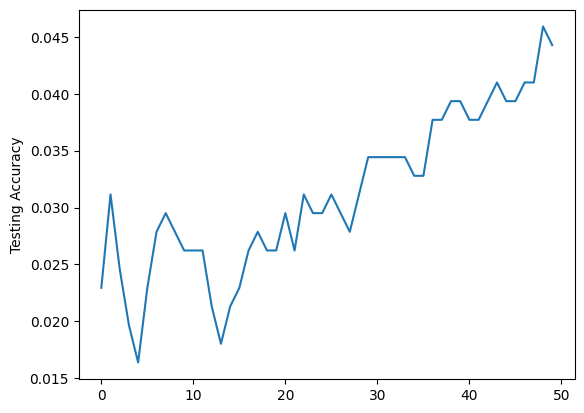

In [13]:
import matplotlib.pyplot as plt

plt.plot(testing_accuracies)
plt.ylabel("Number of Neighbors")
plt.ylabel("Testing Accuracy")

In [14]:
final_model = KNeighborsClassifier(n_neighbors = 28)
final_model.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=28)